<font color="Yellow" Size="6">LOGISTIC REGRESSION </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Train Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', random_state=42)

In [6]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

In [7]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

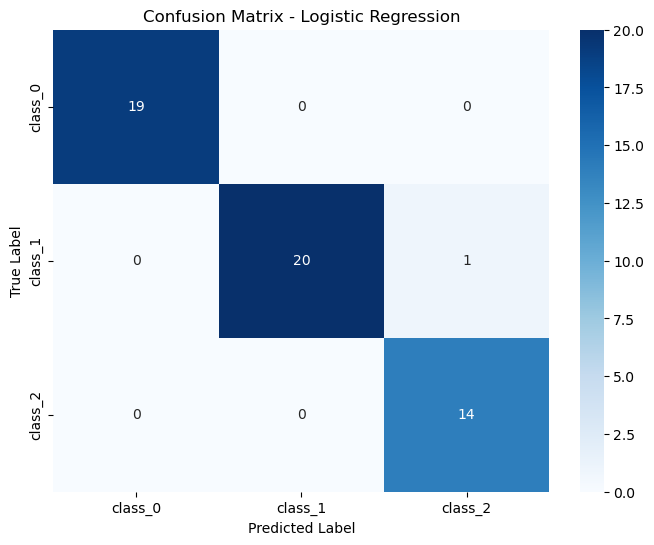

In [8]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
# Predict for a new instance
new_instance = [[13.5, 1.2, 2.7, 15.0, 98.0, 2.3, 2.0, 0.3, 1.5, 5.5, 1.04, 3.0, 800]]  # Example features
new_instance_scaled = scaler.transform(new_instance)
predicted_class = log_reg.predict(new_instance)

In [10]:
print("Predicted Class:", predicted_class)

Predicted Class: [0]


In [11]:
# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))


Classification Report:
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      0.95      0.98        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [12]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815
